#importing libraries

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings('ignore')
#reading the dataset
df = pd.read_csv('clinvar_conflicting.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [177]:
#basic exploratory data analysis to know more about the dataset
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele                65188 non-null object
Consequence        

In [178]:
df.describe()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,SSR,CLASS,DISTANCE,STRAND,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
count,6.518800e+04,65188.000000,65188.000000,65188.000000,59065.000000,104.000000,65188.000000,108.000000,65174.000000,2.0,2.000000,60975.000000,64096.000000,64096.000000,25593.000000
mean,7.757594e+07,0.014511,0.014492,0.015263,1.272869,2.298077,0.252102,825.731481,-0.006659,1.0,-0.080000,0.345058,15.685616,2.554131,-0.402258
std,5.974051e+07,0.057795,0.059542,0.059527,5.343258,4.237786,0.434223,1069.363315,0.999985,0.0,0.024042,0.361238,10.836350,2.961553,1.872684
min,9.610000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,1.0,-0.097000,0.000069,0.001000,-5.477391,-3.000000
25%,3.254179e+07,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,55.500000,-1.000000,1.0,-0.088500,0.024300,7.141000,0.462951,-2.000000
50%,5.797021e+07,0.000000,0.000040,0.000000,1.000000,1.000000,0.000000,469.000000,-1.000000,1.0,-0.080000,0.157000,14.090000,1.642948,-1.000000
75%,1.127454e+08,0.001200,0.001230,0.001600,1.000000,1.000000,1.000000,1415.000000,1.000000,1.0,-0.071500,0.710000,24.100000,4.381392,1.000000
max,2.476080e+08,0.499000,0.499890,0.499800,513.000000,16.000000,1.000000,4759.000000,1.000000,1.0,-0.063000,1.000000,99.000000,46.556261,3.000000


In [179]:
df.fillna(0,inplace=True)

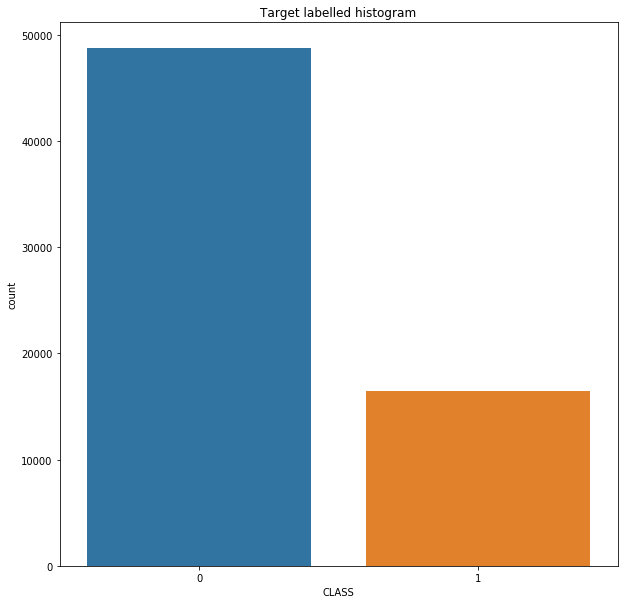

In [180]:
#target histogram
fig=plt.figure(figsize=(10,10))
sns.countplot(x='CLASS',data=df)
plt.title("Target labelled histogram")
plt.show()

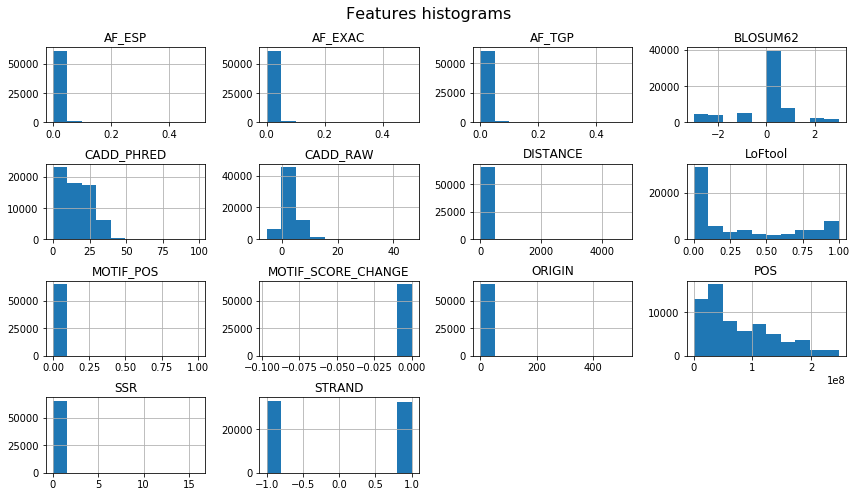

In [181]:
#features histograms
df.drop('CLASS',axis=1).hist(figsize=(12,7))
plt.suptitle("Features histograms", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [182]:
#Preparing data for further analysis
#balancing the target variable (since there are more class 0 than class 1)
#https://stackoverflow.com/questions/45839316/pandas-balancing-data
g = df.groupby('CLASS')
df_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
# Extract smaller sample to avoid memory error later, when training starts
df_balanced = df_balanced.sample(1000)

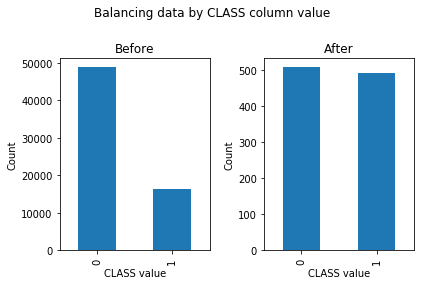

In [183]:
#illustrate balancing results on plots
f, ax = plt.subplots(1,2)
# Before balancing plot
df.CLASS.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title("Before")
ax[0].set_xlabel("CLASS value")
ax[0].set_ylabel("Count")
#After balancing plot
df_balanced.CLASS.value_counts().plot(kind='bar',ax=ax[1])
ax[1].set_title("After")
ax[1].set_xlabel("CLASS value")
ax[1].set_ylabel("Count")
plt.suptitle("Balancing data by CLASS column value")
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

In [184]:
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV, RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss

In [185]:
#Features are all columns except 'CLASS'
#Target label is the 'CLASS' column
X=df_balanced.drop('CLASS',axis=1)
# One hot encoding
X=pd.get_dummies(X, drop_first=True)
y=df_balanced['CLASS']
y=pd.get_dummies(y, drop_first=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


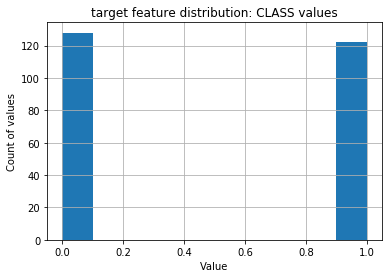

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
#Normilization of data with StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_test.hist()
plt.title("target feature distribution: CLASS values")
plt.xlabel("Value")
plt.ylabel("Count of values")
plt.show()

In [187]:
models=[LogisticRegression(),
        LogisticRegressionCV(),
        PassiveAggressiveClassifier(),
        RidgeClassifier(),
        RidgeClassifierCV(),
        KNeighborsClassifier(),
        NearestCentroid(),
        DecisionTreeClassifier(learning_rate),
        AdaBoostClassifier(),
        ExtraTreesClassifier(max_features="log2"),
        GradientBoostingClassifier(max_features="log2"),
        RandomForestClassifier(max_features="log2"),
        SGDClassifier(), 
        GaussianNB(),
        GaussianProcessClassifier(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        MLPClassifier(),
        SVC()]

In [188]:
accuracy_by_model={}

for model in models:
    model.fit(X_train,y_train)
    pred_y=model.predict(X_test)
    score=accuracy_score(y_test,pred_y)
    model_name=model.__class__.__name__
    accuracy_by_model[model_name]=score

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value

In [189]:
acc= pd.DataFrame(list(accuracy_by_model.items()), columns=['Model', 'Accuracy']).sort_values('Accuracy', ascending=False).reset_index(drop=True)

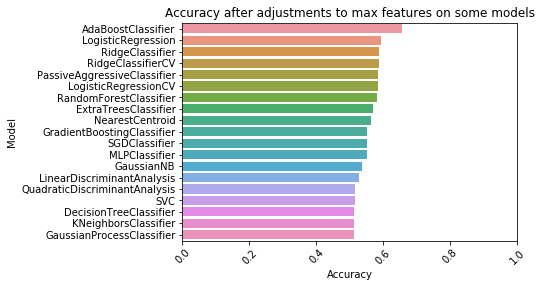

In [190]:
acc.index=acc.index+1
sns.barplot(data=acc, y='Model', x='Accuracy')
plt.xlim(0,1)
plt.title('Accuracy after adjustments to max features on some models')

plt.xticks(rotation=45)
plt.show()

In [191]:
#Print table
acc

,Model,Accuracy
1,AdaBoostClassifier,0.656
2,LogisticRegression,0.592
3,RidgeClassifier,0.588
4,RidgeClassifierCV,0.588
5,PassiveAggressiveClassifier,0.584
6,LogisticRegressionCV,0.584
7,RandomForestClassifier,0.580
8,ExtraTreesClassifier,0.568
9,NearestCentroid,0.564
10,GradientBoostingClassifier,0.552


In [192]:
best_model = acc[acc['Accuracy']==acc['Acurracy'].max()]
best_model

KeyError: 'Acurracy'